In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
import seaborn as sns


In [14]:
iris = sns.load_dataset('iris')

iris.dtypes

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


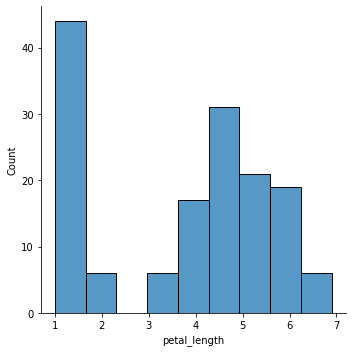

In [22]:
# What does the distribution of petal lengths look like?

pedal_distribution = sns.displot(iris.petal_length)

<AxesSubplot:xlabel='petal_width', ylabel='petal_length'>

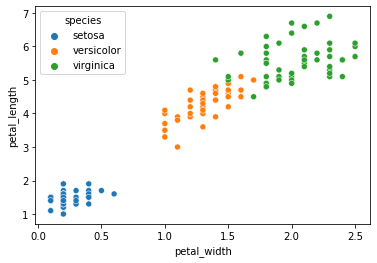

In [35]:
# Is there a correlation between petal length and petal width? --- Yes

sns.scatterplot(x='petal_width', y = 'petal_length', data=iris, hue = 'species')

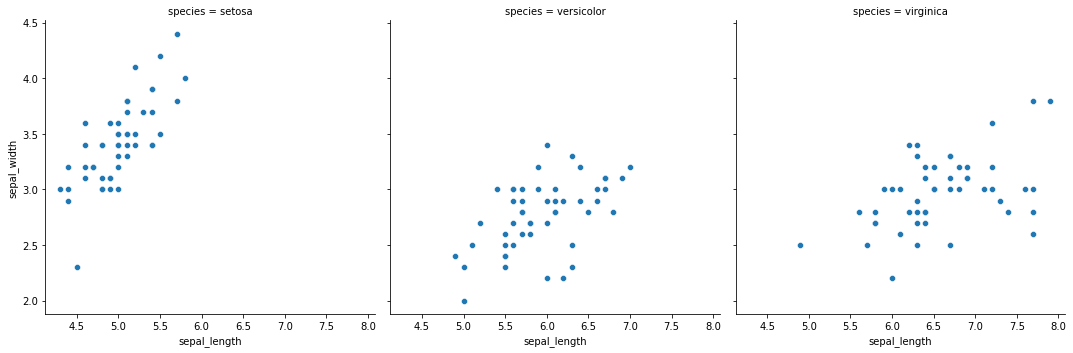

In [40]:
## Would it be reasonable to predict species based on sepal width and sepal length?

sns.relplot(x='sepal_length', y = 'sepal_width', col = 'species', data=iris)

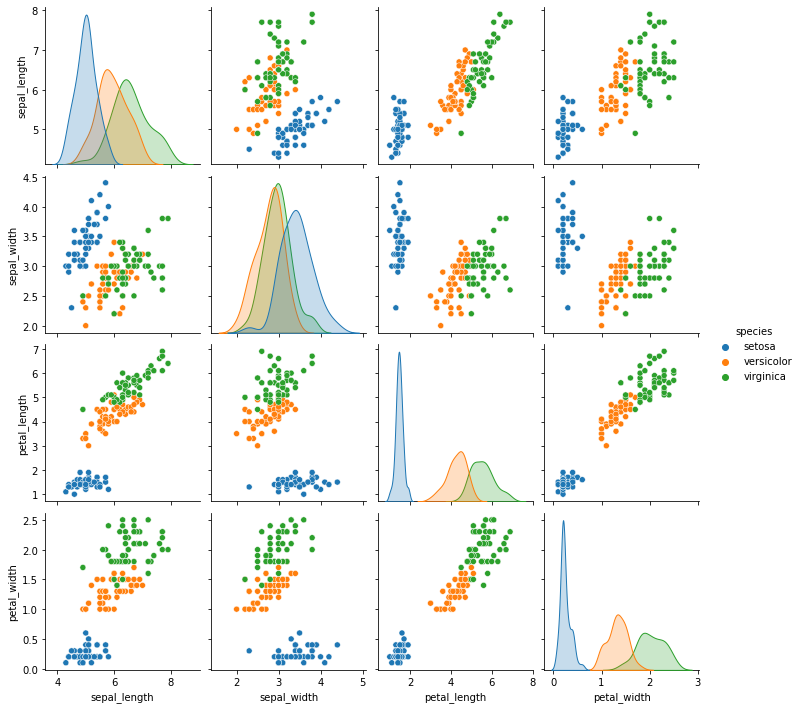

In [41]:
# Which features would be best used to predict species?
sns.pairplot(iris, hue='species')

## petal length vs petal width will be best beacuse it has highest correlation

## Next Sub- Exercise loading anscombe data set

In [44]:
anscombe = sns.load_dataset('anscombe')
anscombe.head()
anscombe.shape

(44, 3)

In [48]:
# Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice? 



anscombe_group = anscombe.groupby('dataset')

anscombe_group.describe()
# The x's are all the same 

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

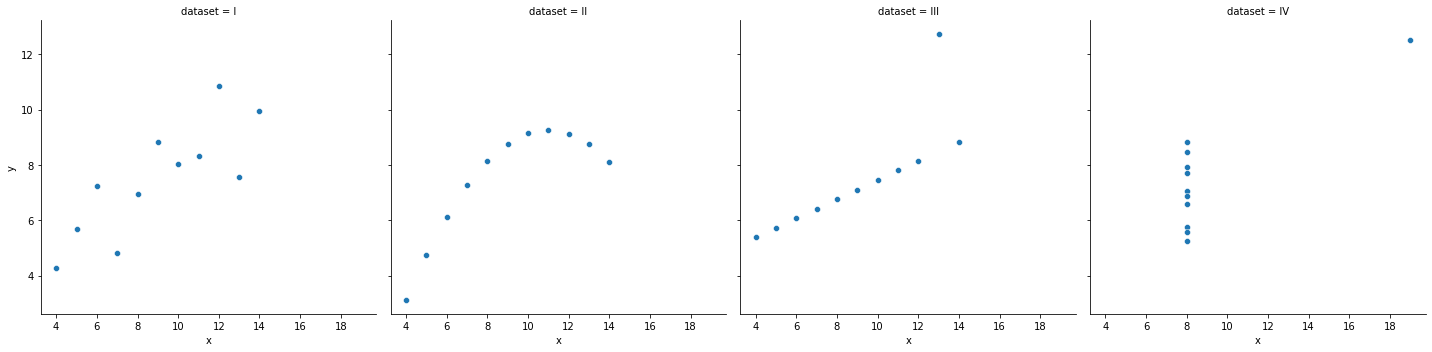

In [52]:
# Plot the x and y values from the anscombe data. Each dataset should be in a separate column.
sns.relplot(x = 'x',y = 'y', col = 'dataset', data=anscombe)

In [57]:
# Load the InsectSprays dataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.

insect_spray = data('InsectSprays')

data('InsectSprays', show_doc = True)

insect_spray.head()

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A


<AxesSubplot:xlabel='count', ylabel='spray'>

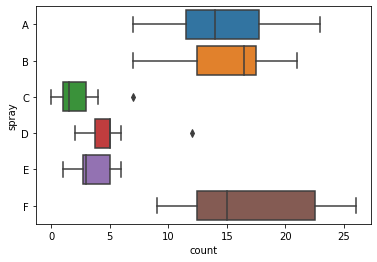

In [59]:
sns.boxplot(y = 'spray', x='count', data=insect_spray)

In [91]:
# Load the swiss dataset and read it's documentation. The swiss dataset is available from pydatset rather than seaborn. Create visualizations to answer the following questions:

swiss = data('swiss')

swiss.head()



,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [79]:
swiss['is_catholic'] = swiss.Catholic > 51

swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False


<AxesSubplot:xlabel='is_catholic', ylabel='Fertility'>

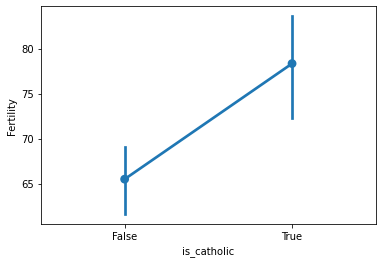

In [84]:
sns.pointplot(x='is_catholic', y ='Fertility', data=swiss)

## there is more change being catholic is more fertile

In [101]:
#swiss = swiss.drop(columns = ['is_catholic'])

swiss.corr().Fertility

Fertility           1.000000
Agriculture         0.353079
Examination        -0.645883
Education          -0.663789
Catholic            0.463685
Infant.Mortality    0.416556
Name: Fertility, dtype: float64

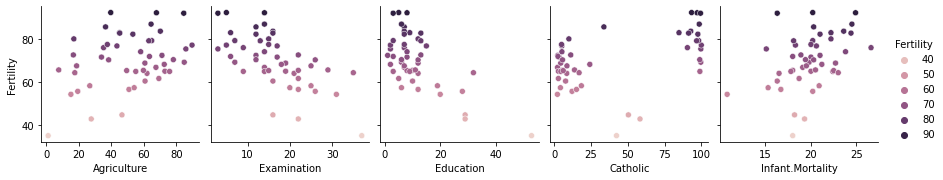

In [99]:
sns.pairplot(swiss, hue = 'Fertility', y_vars= 'Fertility',)

In [102]:
# Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.
from env import host, user, password
def get_db_url(dbname, username=user, hostname=host, passw=password):
    url = f'mysql+pymysql://{username}:{passw}@{hostname}/{chipotle}'
    return url



In [107]:
chipo_orders  = pd.read_sql('SELECT * FROM orders',get_db_url('chipotle'))

chipo_orders.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [114]:
dollarizer = lambda x: float(x[1:-1])
chipo_orders.item_price = chipo_orders.item_price.apply(dollarizer)

In [124]:
most_rev = chipo_orders.groupby('item_name').item_price.sum().nlargest(n=4).reset_index()

most_rev

,item_name,item_price
0,Chicken Bowl,7342.73
1,Chicken Burrito,5575.82
2,Steak Burrito,3851.43
3,Steak Bowl,2260.19


<AxesSubplot:xlabel='item_name', ylabel='item_price'>

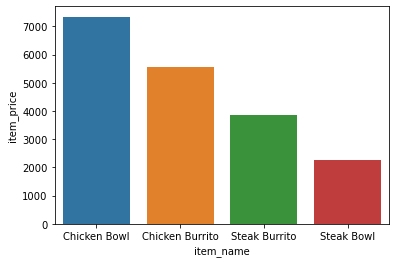

In [125]:
sns.barplot(x = 'item_name', y = 'item_price', data=most_rev)

In [127]:
# Load the sleepstudy data and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.
sleepy = data('sleepstudy')
sleepy.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [134]:
avg_reaction = sleepy.groupby('Days').Reaction.mean


avg_reaction.dtypes 
#sns.lineplot()

AttributeError: 'function' object has no attribute 'dtypes'

<AxesSubplot:xlabel='Days', ylabel='Reaction'>

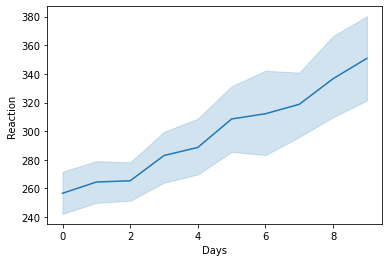

In [136]:
sns.lineplot(x = 'Days', y = 'Reaction', data=sleepy, estimator='mean')